In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Piped output from ness-centroid.c via awk foer easy readin:
awk '{print $3,$5,$7,$9,$11}' nr_11-49-35--142.txt  > test.dat


In [4]:
data = np.loadtxt("nr_11.51.11_143.dat", unpack=True)
print data[0]

[ 66.691513  67.420349  67.790886  68.284897  68.661873  68.746872
  67.866562  67.823578  68.647285  69.636604  69.278702  68.731316
  68.522438  67.956512  68.505035  68.811272  68.950081  68.5513    68.546211
  68.360252  67.628479  68.660103  69.071579  68.705322  68.348412  67.4133
  68.333084  68.0756    68.53521   67.643181  68.434082  68.016449
  69.224808  67.015411  68.03315   68.655128  68.899193  68.315887
  67.528122  67.198608  68.24118   68.153854  68.435287  68.474976
  68.138062  67.881477  67.981163  69.104759  68.400772  68.938118
  67.778114  68.43602   67.501747  68.876999  68.121048  69.288651
  68.40815   68.292709  68.519791  68.021492  68.059242  68.625801
  68.024231  68.328949  67.94471   68.855682  68.400719  68.438774
  68.320641  69.242828  67.705978  67.786362  67.678474  68.578583
  69.168922  68.551208  68.22876   67.237083  68.642097  68.68161
  69.465439  67.749718  68.002678  67.584854  69.171341  67.972717
  69.260925  68.242775  68.49115   67.23705

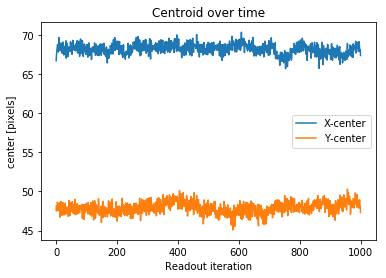

In [5]:
plt.plot (data[0], label="X-center")
plt.plot (data[1], label="Y-center")
plt.legend()
plt.title ("Centroid over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("center [pixels]")
plt.savefig ("xycentroid.png")

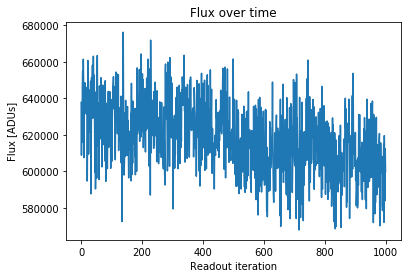

In [6]:
plt.figure()
plt.plot (data[2])
plt.title("Flux over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("Flux [ADUs]")
plt.savefig ("flux.png")

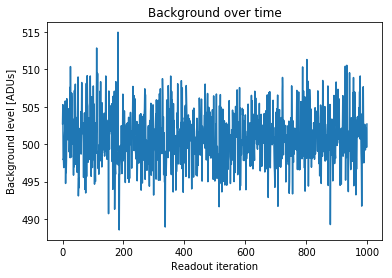

In [7]:
plt.figure()
plt.plot (data[3])
plt.title("Background over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("Background level [ADUs]")
plt.savefig ("background.png")

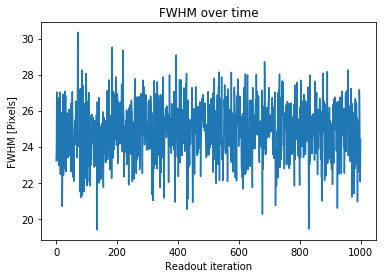

In [8]:
plt.figure()
plt.plot (data[4])
plt.title("FWHM over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("FWHM [Pixels]")
plt.savefig ("fwhm.png")

(1, 100000)

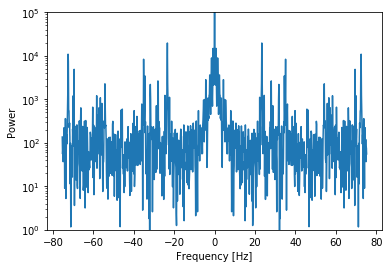

In [28]:
indata = data[0]# - np.mean (data[0])
psX = np.abs (np.fft.fft (indata))**2
time_step = 0.00663 # derive from image header of the input file; change as you use different input files!
freqs = np.fft.fftfreq (indata.size,time_step)
idx = np.argsort (freqs)


plt.plot (freqs[idx],psX[idx])
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Power")
plt.yscale('log')
plt.ylim([1,100000])
